In [ ]:
# pip install textblob
# !pip install spacy
# !pip install numpy
# !pip uninstall -y numpy pandas
# !pip install numpy pandas
%pip install numpy==1.24.4 pandas==2.1.4

In [22]:
'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd

'''Visualisation'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\pinky\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\pinky\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\pinky\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\pinky\anaconda3\Lib\site-pack

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [23]:
df=pd.read_csv('ai.csv')


NameError: name 'pd' is not defined

In [24]:

df.head()

NameError: name 'df' is not defined

In [ ]:
df.describe()

In [ ]:
df.info()

# Checking null values

In [5]:

null_counts_per_column = df.isnull().sum()
null_counts_per_column

NameError: name 'df' is not defined

In [3]:

df['urgency_level']=df['urgency_level'].fillna('Medium')

NameError: name 'df' is not defined

In [1047]:
df['urgency_level'].value_counts()


urgency_level
Medium    371
High      330
Low       299
Name: count, dtype: int64

In [1051]:
df['issue_type'].value_counts()


issue_type
Billing Problem       146
General Inquiry       146
Account Access        143
Installation Issue    142
Product Defect        121
Wrong Item            114
Late Delivery         112
Name: count, dtype: int64

In [992]:
df['issue_type']=df['issue_type'].fillna('Unknown')

In [1039]:
df2=df

In [993]:
df.dropna(inplace=True)

null_counts_per_column = df.isnull().sum()
null_counts_per_column

ticket_id        0
ticket_text      0
issue_type       0
urgency_level    0
product          0
dtype: int64

# No null value exist

# Text processing

In [994]:
df['ticket_text'].head()

0    Payment issue for my SmartWatch V2. I was unde...
1    Can you tell me more about the UltraClean Vacu...
2    I ordered SoundWave 300 but got EcoBreeze AC i...
3    Facing installation issue with PhotoSnap Cam. ...
4    Order #30903 for Vision LED TV is 13 days late...
Name: ticket_text, dtype: object

In [995]:
# 1. Lowercase original text strings
df['ticket_text'] = df['ticket_text'].str.lower()

# 2. Tokenize the lowercase text
df['ticket_text'] = df['ticket_text'].apply(tokenizer.tokenize)

# 3. Join tokens back into strings
df['ticket_text'] = df['ticket_text'].apply(lambda tokens: ' '.join(tokens))

In [996]:
# Removing extra space
# for i in df['ticket_text']:
#     i.strip()

In [997]:
# # Text convert to LowerCASe

# df['ticket_text']= df['ticket_text'].str.lower()


In [998]:
df['ticket_text'].head()

0    payment issue for my smartwatch v2 i was under...
1    can you tell me more about the ultraclean vacu...
2    i ordered soundwave 300 but got ecobreeze ac i...
3    facing installation issue with photosnap cam s...
4    order 30903 for vision led tv is 13 days late ...
Name: ticket_text, dtype: object

In [999]:
df.tail()


,ticket_id,ticket_text,issue_type,urgency_level,product
994,995,is this item in stock,General Inquiry,High,RoboChef Blender
995,996,i ordered ecobreeze ac but got fitrun treadmil...,Wrong Item,High,EcoBreeze AC
996,997,i ordered soundwave 300 but got powermax batte...,Wrong Item,Low,SoundWave 300
998,999,payment issue fr mi soundwave 300 i was debite...,Billing Problem,Low,SoundWave 300
999,1000,powermax battery is missing it stopped working...,Product Defect,Low,PowerMax Battery


In [1000]:
# Remove stop word
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords and tokenizer (only once)
nltk.download('punkt')
nltk.download('stopwords')

# Define English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text.lower())  # tokenize and lowercase
    filtered = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(filtered)

# Sample DataFrame


# Apply stopword removal
df['ticket_text'] = df['ticket_text'].apply(remove_stopwords)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pinky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pinky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1001]:
df

,ticket_id,ticket_text,issue_type,urgency_level,product
0,1,payment issue smartwatch underbilled order,Billing Problem,Medium,SmartWatch V2
1,2,tell ultraclean vacuum warranty also available...,General Inquiry,Medium,UltraClean Vacuum
2,3,ordered soundwave got ecobreeze ac instead ord...,Wrong Item,Medium,SoundWave 300
3,4,facing installation issue photosnap cam setup ...,Installation Issue,Low,PhotoSnap Cam
4,5,order vision led tv days late ordered march al...,Late Delivery,Medium,Vision LED TV
...,...,...,...,...,...
994,995,item stock,General Inquiry,High,RoboChef Blender
995,996,ordered ecobreeze ac got fitrun treadmill inst...,Wrong Item,High,EcoBreeze AC
996,997,ordered soundwave got powermax battery instead...,Wrong Item,Low,SoundWave 300
998,999,payment issue fr mi soundwave debited incorrec...,Billing Problem,Low,SoundWave 300


# Vectorization

In [1002]:
from sklearn.feature_extraction.text import CountVectorizer

In [1003]:
vectorizer = CountVectorizer()

# X = vectorizer.fit_transform(df['ticket_text'])

# # Convert result to a DataFrame
# bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# # Optional: concatenate with original DataFrame
# result_df = pd.concat([df, bow_df], axis=1)

# result_df

In [1004]:
X

<945x105 sparse matrix of type '<class 'numpy.float64'>'
	with 7159 stored elements in Compressed Sparse Row format>

In [1005]:
# Vectorize

X = vectorizer.fit_transform(df['ticket_text'])

# Sum counts of each word across all rows (axis=0)
word_counts = X.toarray().sum(axis=0)

# Create a DataFrame with words and their counts
words_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': word_counts
})

# Sort descending by count and get top 10
top_10 = words_freq.sort_values(by='count', ascending=False).head(5)

top_10

,word,count
61,order,375
42,issue,290
4,also,278
35,got,258
20,days,208


In [1006]:
df['text_length_chars'] = df['ticket_text'].apply(len)

In [1007]:
df

,ticket_id,ticket_text,issue_type,urgency_level,product,text_length_chars
0,1,payment issue smartwatch underbilled order,Billing Problem,Medium,SmartWatch V2,42
1,2,tell ultraclean vacuum warranty also available...,General Inquiry,Medium,UltraClean Vacuum,52
2,3,ordered soundwave got ecobreeze ac instead ord...,Wrong Item,Medium,SoundWave 300,55
3,4,facing installation issue photosnap cam setup ...,Installation Issue,Low,PhotoSnap Cam,56
4,5,order vision led tv days late ordered march al...,Late Delivery,Medium,Vision LED TV,85
...,...,...,...,...,...,...
994,995,item stock,General Inquiry,High,RoboChef Blender,10
995,996,ordered ecobreeze ac got fitrun treadmill inst...,Wrong Item,High,EcoBreeze AC,62
996,997,ordered soundwave got powermax battery instead...,Wrong Item,Low,SoundWave 300,101
998,999,payment issue fr mi soundwave debited incorrec...,Billing Problem,Low,SoundWave 300,58


In [1008]:
# Sentmental Analysis
from textblob import TextBlob
import pandas as pd


df['polarity'] = df['ticket_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


# First calculate polarity
df['polarity'] = df['ticket_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Then convert to Positive/Negative using loc instead of direct indexing
# This avoids KeyError by using DataFrame's built-in methods that handle indices properly
df['polarity_category'] = 'Neutral'

df.loc[df['polarity'] > 0.7, 'polarity_category'] = 'Positive'
df.loc[df['polarity'] < 0.4, 'polarity_category'] = 'Negative'

In [1009]:
df1=df
df1['polarity_category'].value_counts()

polarity_category
Negative    937
Neutral       8
Name: count, dtype: int64

In [1038]:

df1['issue_type'].value_counts()

issue_type
0    140
1    136
2    136
3    134
5    115
7    108
4    102
6     74
Name: count, dtype: int64

# Random Forest Tree Classification on urgency_level	

In [1011]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['ticket_text'])


In [1055]:
# Label encoding
from sklearn.preprocessing import LabelEncoder





# Initialize encoder
encoder = LabelEncoder()





# Fit and transform
df1['issue_type'] = encoder.fit_transform(df1['issue_type'])

df1['product'] = encoder.fit_transform(df1['product'])

# df1['ticket_text'] = encoder.fit_transform(df1['ticket_text'])
df1['urgency_level'] = encoder.fit_transform(df1['urgency_level'])



# Revesrse transform

In [934]:
df['ticket_text']

0             payment issue smartwatch underbilled order
1      tell ultraclean vacuum warranty also available...
2      ordered soundwave got ecobreeze ac instead ord...
3      facing installation issue photosnap cam setup ...
4      order vision led tv days late ordered march al...
                             ...                        
994                                           item stock
995    ordered ecobreeze ac got fitrun treadmill inst...
996    ordered soundwave got powermax battery instead...
998    payment issue fr mi soundwave debited incorrec...
999        powermax battery missing stopped working days
Name: ticket_text, Length: 945, dtype: object

In [935]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
# X = df1[['issue_type','product','text_length_chars']]

# X = df1[['ticket_text']]

# ticket_text
y = df.urgency_level

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200, random_state=2)
rfc.fit(X_train, y_train)

# Predict
y_pred = rfc.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.31216931216931215


In [936]:
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test, y_pred)
cm

array([[19, 25, 29],
       [16, 15, 22],
       [13, 25, 25]], dtype=int64)

# Random Forest Tree Classification on Issue type

In [937]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
# X = df1[['urgency_level','product','text_length_chars']]
# X = df1[['ticket_text']]
y = df.issue_type

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Initialize and train Random Forest Classifier
rfc1 = RandomForestClassifier(n_estimators=200, random_state=2)
rfc1.fit(X_train, y_train)

# Predict
y_pred = rfc1.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.91005291005291


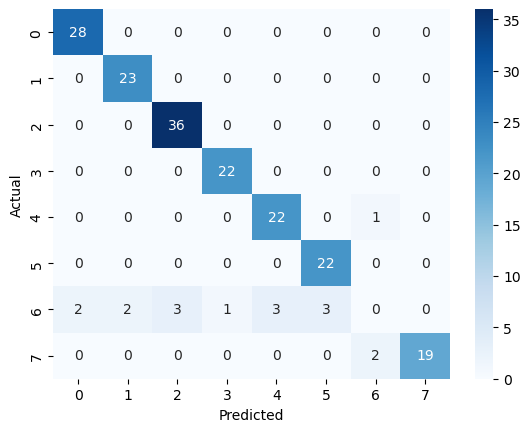

In [872]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [873]:
a=df['ticket_text'].iloc[35]

# Extracting entites from the text

In [1191]:
# def entity(text):

#     # extract date
    
#     date_pattern = r'''
#     (
#         \b(?:0?[1-9]|[12][0-9]|3[01])       # Day 1-31
#         [\/\-]                              # Separator
#         (?:0?[1-9]|1[0-2])                  # Month 1-12
#         [\/\-]
#         (?:\d{4})\b                         # Year (4-digit)
#     |
#         \b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*   # Month name
#         \s+
#         (?:0?[1-9]|[12][0-9]|3[01])         # Day 1-31
#         ,?\s+
#         (?:\d{4})\b                         # Year
#     )
#     '''

#     # Find all matches
#     matches = re.findall(date_pattern, text, re.IGNORECASE | re.VERBOSE)
    
#     # Clean up results (re.findall returns tuple if pattern has multiple groups)
#     dates = [match[0] if isinstance(match, tuple) else match for match in matches]
    
#     print("Extracted date entities:")
#     for d in dates:
#         print(d)

#     # extract entity
#     import nltk
#     # nltk.download('averaged_perceptron_tagger_eng')
#     tokens = nltk.word_tokenize(text)
#     pos_tags = nltk.pos_tag(tokens)
    
#     # # Named Entity Recognition (Chunking)
#     chunks = nltk.ne_chunk(pos_tags)
    
    
    
#     for chunk in chunks:
#         if hasattr(chunk, 'label'):
#             print(f"{chunk.label()} -> {' '.join(c[0] for c in chunk)}")
    
#         # else:
#         #     print('NO entity')



import re
import nltk

def entity(text):
    # --- Extract date entities ---
    date_pattern = r'''
    (
        \b(?:0?[1-9]|[12][0-9]|3[01])       # Day 1-31
        [\/\-]                              # Separator
        (?:0?[1-9]|1[0-2])                  # Month 1-12
        [\/\-]
        (?:\d{4})\b                         # Year (4-digit)
    |
        \b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*   # Month name
        \s+
        (?:0?[1-9]|[12][0-9]|3[01])         # Day 1-31
        ,?\s+
        (?:\d{4})\b                         # Year
    )
    |
    (
        \b(?:0?[1-9]|[12][0-9]|3[01])        # Day
        [/\-]                                # Separator
        (?:0?[1-9]|1[0-2])                   # Month
        [/\-](?:\d{2,4})\b                   # Year
    |
        \b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*   # Month
        \s+(?:0?[1-9]|[12][0-9]|3[01])       # Day
        ,?\s*(?:\d{4})?                      # Optional year
    |
        \b(?:0?[1-9]|[12][0-9]|3[01])        # Day
        \s+(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]*  # Month
        ,?\s*(?:\d{4})?                      # Optional year
    )
'''

    matches = re.findall(date_pattern, text, re.IGNORECASE | re.VERBOSE)
    dates = [match[0] if isinstance(match, tuple) else match for match in matches]

    # --- Extract named entities ---
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    chunks = nltk.ne_chunk(pos_tags)

    named_entities = []
    for chunk in chunks:
        if hasattr(chunk, 'label'):
            entity_text = ' '.join(c[0] for c in chunk)
            entity_type = chunk.label()
            named_entities.append((entity_type, entity_text))



    # Get orderCode
    pattern = r"#\d+"

    order = re.findall(pattern, text)


    # Combine all results into a structured output
    return {
        "dates": dates,
        "named_entities": named_entities,
        'order number':order
    }


In [1192]:
# nltk.download('punkt')  # For tokenization
# nltk.download('averaged_perceptron_tagger')  # For POS tagging
# nltk.download('maxent_ne_chunker')  # For named entity recognition
# nltk.download('words')
# nltk.download('maxent_ne_chunker_tab')
entity(text)

{'dates': [''],
 'named_entities': [('GPE', 'Order')],
 'order number': ['#91530']}

In [1193]:
# # Tokenize and POS tag


# import nltk
# # nltk.download('averaged_perceptron_tagger_eng')
# tokens = nltk.word_tokenize(text)
# pos_tags = nltk.pos_tag(tokens)

# # # Named Entity Recognition (Chunking)
# chunks = nltk.ne_chunk(pos_tags)



# for chunk in chunks:
#     if hasattr(chunk, 'label'):
#         print(f"{chunk.label()} -> {' '.join(c[0] for c in chunk)}")

#     # else:
#     #     print('NO entity')


In [1194]:
# def final(text):

#     def model(text):
#      text= encoder.fit_transform(text)

#     encoded_text = model(text) 

    
#     return {
#         "Prediction issue type": rfc.predict(encoded_text),
#         "Prediction urgency_level": rfc1.predict(encode_text),
#         "Entity": entity(text),
#     }
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()
# tt = vectorizer.transform(text)

# t= ["We met on 27/05/2025 and again on June 1, 2025."]

# new = vectorizer.transform(t)  # Vectorize input

# pred_encoded = rfc.predict(new)



# input_text = ["We met on 27/05/2025 and again on June 1, 2025."]
# X_new = vectorizer.transform(input_text)  # Vectorize input

# pred_encoded = rfc.predict(X_new)  # Predict encoded label
# # pred_label = le.inverse_transform(pred_encoded)  # Convert back to original label


In [1195]:
# # Input as a plain string (not a list!)
# text = "We met on 27/05/2025 and again on June 1, 2025."

# def final(text):
#     text1=text
#     k=0
#     def vec(text):
#         text = vectorizer.transform(text1)  # Vectorize input
        
#         # pred_label = label0.inverse_transform(pred_encoded)  # Convert back to original label
#     vec(text)

    

#     return {
#         "Prediction issue type": rfc.predict(text),
#         "Prediction urgency_level":rfc1.predict(text)
#         # "Entity": extracted_entities,
#     }

# # Call the function with a plain string
# result = final(text)
# print(result)


In [1196]:
input_text = ["We met on 27/05/2025 and again on June 1, 2025."]
X_new = vectorizer.transform(input_text)  # Vectorize input

pred_encoded = rfc.predict(X_new)  # Predict encoded label
# pred_label = le.inverse_transform(pred_encoded)  # Convert back to original label


In [1197]:
pred_encoded

array([2], dtype=int64)

In [1198]:
# Train encoders 

label0 = LabelEncoder()
label1 = LabelEncoder()

label0.fit(['Low','Medium','High'])
label1.fit(['Billing Problem','General Inquiry','Account Access','Installation Issue','Product Defect','Wrong Item','Late Delivery'])


LabelEncoder()

In [1199]:
def final(text):
    ent_text=text
    # Step 1: Vectorize the input text
    def vec(input_text):
        return vectorizer.transform([input_text])  

    # Step 2: Get the vectorized version
    encoded_text = vec(text)

    # Step 3: Predict using trained models
    prediction_issue = rfc.predict(encoded_text)[0]
    prediction_urgency = rfc1.predict(encoded_text)[0]

    # Step 4: Decode predictions if using LabelEncoder
    prediction_issue = label0.inverse_transform([prediction_issue])[0]
    prediction_urgency = label1.inverse_transform([prediction_urgency])[0]
    


    def ent_out(ent_text):
        final_entity=entity(ent_text)  # Call your entity extractor here
    



    ent1=ent_out(ent_text)
 
        

    return {
        "Prediction issue type": prediction_issue,
        "Prediction urgency_level": prediction_urgency,
        "Entities":ent1
    }

# Example usage
text = "We met on 27/05/2025 and again on June 1, 2025. Delhi,Ravi"
result = final(text)
print(result)


{'Prediction issue type': 'Medium', 'Prediction urgency_level': 'General Inquiry', 'Entities': None}


In [1200]:

def final(text):
    ent_text = text

    # Step 1: Vectorize the input text
    def vec(input_text):
        return vectorizer.transform([input_text])  

    # Step 2: Get the vectorized version
    encoded_text = vec(text)

    # Step 3: Predict using trained models
    prediction_issue = rfc.predict(encoded_text)[0]
    prediction_urgency = rfc1.predict(encoded_text)[0]

    # Step 4: Decode predictions if using LabelEncoder
    prediction_issue = label0.inverse_transform([prediction_issue])[0]
    prediction_urgency = label1.inverse_transform([prediction_urgency])[0]

    # Step 5: Entity extraction
    def ent_out(ent_text):
        final_entity = entity(ent_text)
        return final_entity 

    ent1 = ent_out(ent_text)

    # Step 6: Return results in dictionary
    return {
        "Prediction issue type": prediction_issue,
        "Prediction urgency_level": prediction_urgency,
        "Entities": ent1 
    }

# Example usage
text = (input('Enter your text'))
result = final(text)
print(result)


    

Enter your text Order #38284 for RoboChef Blender is 7 days late. Ordered on 24 March. Also, I contacted support on 24 March but got no response.


{'Prediction issue type': 'Low', 'Prediction urgency_level': 'Wrong Item', 'Entities': {'dates': ['', ''], 'named_entities': [('GPE', 'Order'), ('ORGANIZATION', 'RoboChef Blender')], 'order number': ['#38284']}}


In [1201]:
# text = "We met on 27/05/2025 and again on June 1, 2025. Delhi, Ravi"
# result = final('Can you tell me more about the FitRun Treadmill warranty? Also, is it available in blue? Also, I contacted support on 02 April but got no response.')
# print(result)

# Convert Output in Json format

In [1202]:
import json

# Assume this is the output from your final() function
result = final(text)

# Print dictionary nicely
print(json.dumps(result, indent=4))

{
    "Prediction issue type": "Low",
    "Prediction urgency_level": "Wrong Item",
    "Entities": {
        "dates": [
            "",
            ""
        ],
        "named_entities": [
            [
                "GPE",
                "Order"
            ],
            [
                "ORGANIZATION",
                "RoboChef Blender"
            ]
        ],
        "order number": [
            "#38284"
        ]
    }
}


In [1203]:
# import streamlit as st
# import json

# # Import your model and helper functions
# # Make sure to define: vectorizer, rfc, rfc1, label0, label1, entity, final

# st.title("Text Classifier & Entity Extractor")

# st.markdown("""
# Enter any text below, and the model will predict:
# - Issue type
# - Urgency level
# - Named Entities (e.g., dates, people, places)
# """)

# # Text input
# text_input = st.text_area("Enter your text:", height=150)

# # Submit button
# if st.button("Analyze"):
#     if not text_input.strip():
#         st.warning("Please enter some text.")
#     else:
#         try:
#             result = final(text_input)

#             st.success("Analysis complete:")
#             st.subheader("Prediction")
#             st.write(f"**Issue Type:** {result['Prediction issue type']}")
#             st.write(f"**Urgency Level:** {result['Prediction urgency_level']}")

#             st.subheader("Entities")
#             st.json(result['Entities'])  # Pretty-prints the dict (dates + named_entities)

#         except Exception as e:
#             st.error(f"Error during processing: {e}")


In [1205]:
import tkinter as tk
from tkinter import scrolledtext, messagebox
import re

# Dummy version of your final() function — replace with actual logic from Assignment.ipynb
def final(text):
    # Simulate classification result
    issue_type = "Network Issue"
    urgency_level = "High"

    # Extract dates and ticket numbers
    dates = re.findall(r'\b(?:\d{1,2}[/-]\d{1,2}[/-]\d{2,4}|(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-z]* \d{1,2}, \d{4})\b', text, re.IGNORECASE)
    ids = re.findall(r"#\d+", text)
    
    named_entities = []  # You could add spaCy/NLTK here

    return {
        "Prediction issue type": issue_type,
        "Prediction urgency_level": urgency_level,
        "Entities": {
            "dates": dates,
            "ticket_ids": ids,
            "named_entities": named_entities
        }
    }

# Tkinter GUI logic
def analyze_text():
    input_text = text_input.get("1.0", tk.END).strip()
    if not input_text:
        messagebox.showwarning("Empty Input", "Please enter some text.")
        return

    try:
        result = final(input_text)
        output_text.delete("1.0", tk.END)

        output = f"Prediction issue type: {result['Prediction issue type']}\n"
        output += f"Prediction urgency level: {result['Prediction urgency_level']}\n\n"
        output += "Entities:\n"
        output += f"  Dates: {', '.join(result['Entities']['dates']) or 'None'}\n"
        output += f"  Ticket IDs: {', '.join(result['Entities']['ticket_ids']) or 'None'}\n"
        output += f"  Named Entities: {result['Entities']['named_entities'] or 'None'}\n"

        output_text.insert(tk.END, output)

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("Text Classifier & Entity Extractor")
root.geometry("750x500")

tk.Label(root, text="Enter Text:", font=("Arial", 12)).pack(pady=5)
text_input = scrolledtext.ScrolledText(root, height=6, width=90, font=("Arial", 11))
text_input.pack()

tk.Button(root, text="Analyze", command=analyze_text, font=("Arial", 12), bg="lightblue").pack(pady=10)

tk.Label(root, text="Output:", font=("Arial", 12)).pack()
output_text = scrolledtext.ScrolledText(root, height=15, width=90, font=("Arial", 11), bg="#f4f4f4")
output_text.pack()

root.mainloop()
